#  Imports y setup

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('..')

from algorithms.bubble_sort import bubble_sort
from algorithms.insertion_sort import insertion_sort
from algorithms.merge_sort import merge_sort
from algorithms.quick_sort import quick_sort
from algorithms.heap_sort import heap_sort

# Configuración de gráficas
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

# Cargar resultados

In [3]:
# Cargar datos del CSV generado
df = pd.read_csv('../results/experimental_results.csv')
print("Datos cargados:")
print(df.head(10))
print(f"\nTotal de experimentos: {len(df)}")
print(f"Algoritmos evaluados: {df['Algorithm'].unique()}")

Datos cargados:
        Algorithm  Size      Time
0     Bubble Sort   100  0.000000
1     Bubble Sort   500  0.010090
2     Bubble Sort  1000  0.047912
3     Bubble Sort  2000  0.188325
4     Bubble Sort  3000  0.420128
5  Insertion Sort   100  0.000345
6  Insertion Sort   500  0.004373
7  Insertion Sort  1000  0.018186
8  Insertion Sort  2000  0.080922
9  Insertion Sort  3000  0.205113

Total de experimentos: 28
Algoritmos evaluados: ['Bubble Sort' 'Insertion Sort' 'Merge Sort' 'Quick Sort' 'Heap Sort']


# Análisis estadístico

In [4]:
# Estadísticas por algoritmo
print("Resumen estadístico por algoritmo:\n")
for algo in df['Algorithm'].unique():
    data = df[df['Algorithm'] == algo]
    print(f"{algo}:")
    print(f"  Min time: {data['Time'].min():.6f}s")
    print(f"  Max time: {data['Time'].max():.6f}s")
    print(f"  Avg time: {data['Time'].mean():.6f}s")
    print(f"  Sizes tested: {data['Size'].min()} to {data['Size'].max()}")
    print()

Resumen estadístico por algoritmo:

Bubble Sort:
  Min time: 0.000000s
  Max time: 0.420128s
  Avg time: 0.133291s
  Sizes tested: 100 to 3000

Insertion Sort:
  Min time: 0.000345s
  Max time: 0.205113s
  Avg time: 0.061788s
  Sizes tested: 100 to 3000

Merge Sort:
  Min time: 0.000000s
  Max time: 0.041965s
  Avg time: 0.010756s
  Sizes tested: 100 to 10000

Quick Sort:
  Min time: 0.000336s
  Max time: 0.017465s
  Avg time: 0.005524s
  Sizes tested: 100 to 10000

Heap Sort:
  Min time: 0.000333s
  Max time: 0.054859s
  Avg time: 0.014556s
  Sizes tested: 100 to 10000



# Gráfica comparativa interactiva

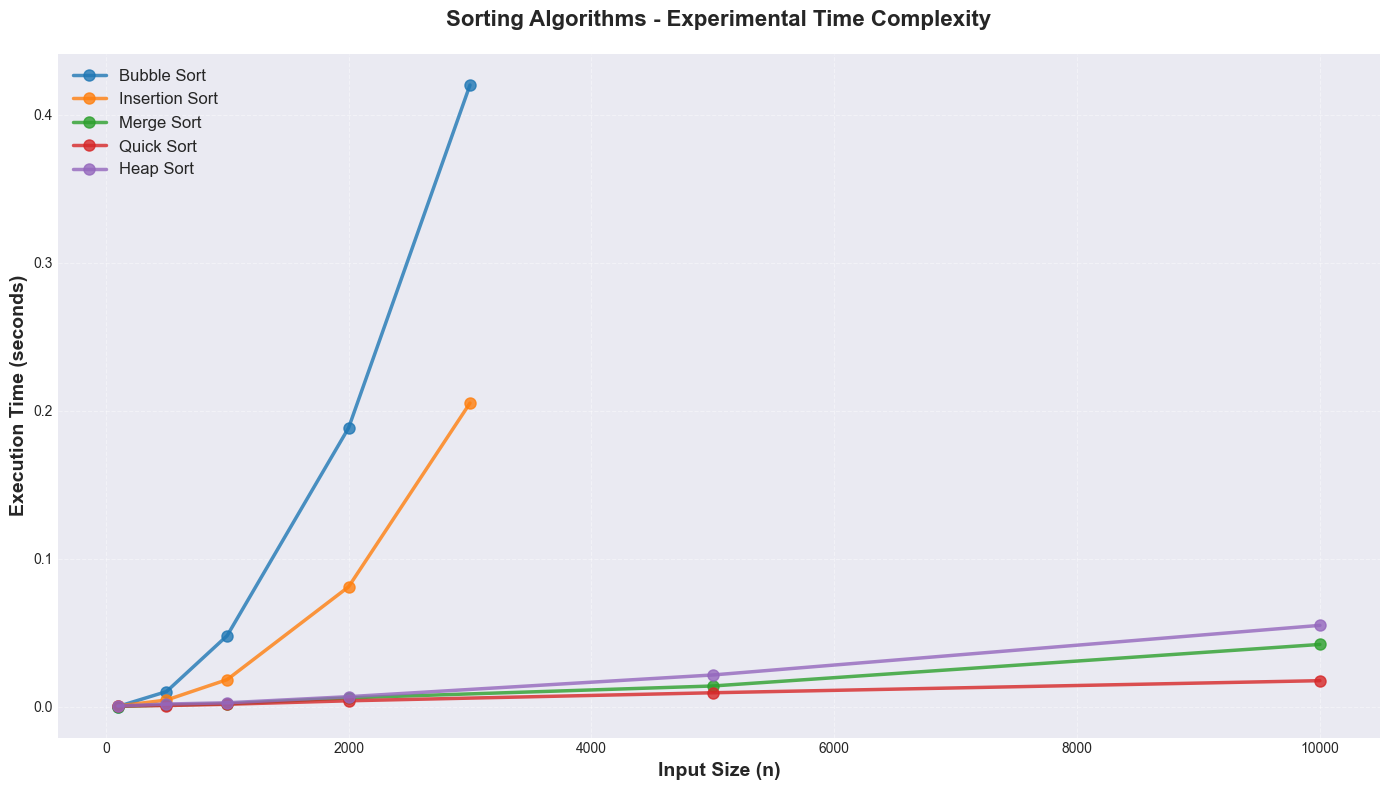

In [5]:
plt.figure(figsize=(14, 8))

for algorithm in df['Algorithm'].unique():
    data = df[df['Algorithm'] == algorithm].sort_values('Size')
    plt.plot(data['Size'], data['Time'],
            marker='o', linewidth=2.5, markersize=8,
            label=algorithm, alpha=0.8)

plt.xlabel('Input Size (n)', fontsize=14, fontweight='bold')
plt.ylabel('Execution Time (seconds)', fontsize=14, fontweight='bold')
plt.title('Sorting Algorithms - Experimental Time Complexity',
          fontsize=16, fontweight='bold', pad=20)
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, alpha=0.4, linestyle='--')
plt.tight_layout()
plt.show()

# Comparación $O(n²)$ vs $O(n*log(n))$

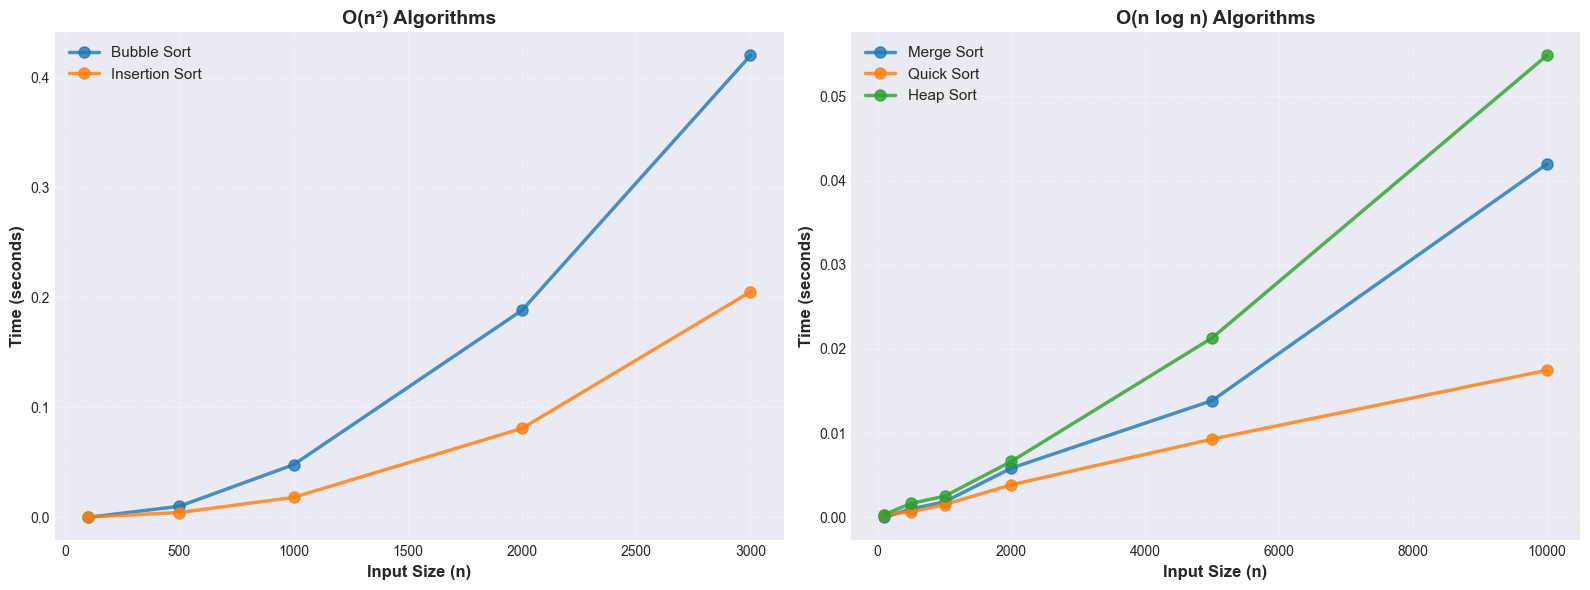

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# O(n²) algorithms
quadratic = ['Bubble Sort', 'Insertion Sort']
for algo in quadratic:
    data = df[df['Algorithm'] == algo].sort_values('Size')
    ax1.plot(data['Size'], data['Time'],
            marker='o', linewidth=2.5, markersize=8,
            label=algo, alpha=0.8)

ax1.set_xlabel('Input Size (n)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Time (seconds)', fontsize=12, fontweight='bold')
ax1.set_title('O(n²) Algorithms', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.4, linestyle='--')

# O(n log n) algorithms
nlogn = ['Merge Sort', 'Quick Sort', 'Heap Sort']
for algo in nlogn:
    data = df[df['Algorithm'] == algo].sort_values('Size')
    ax2.plot(data['Size'], data['Time'],
            marker='o', linewidth=2.5, markersize=8,
            label=algo, alpha=0.8)

ax2.set_xlabel('Input Size (n)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Time (seconds)', fontsize=12, fontweight='bold')
ax2.set_title('O(n log n) Algorithms', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.4, linestyle='--')

plt.tight_layout()
plt.show()

# Verificación teórica vs experimental

In [13]:
# Comparar crecimiento experimental vs teórico
print("Análisis de crecimiento:\n")

for algo in df['Algorithm'].unique():
    data = df[df['Algorithm'] == algo].sort_values('Size')
    sizes = data['Size'].values
    times = data['Time'].values

    if len(sizes) >= 2:
        # Ratio de crecimiento
        ratio = times[-1] / times[0]
        size_ratio = sizes[-1] / sizes[0]

        print(f"{algo}:")
        print(f"  Size increased by: {size_ratio:.1f}x")
        print(f"  Time increased by: {ratio:.1f}x")

        # Verificación teórica
        if 'Bubble' in algo or 'Insertion' in algo:
            expected = size_ratio ** 2
            print(f"  Expected for O(n²): {expected:.1f}x")
        else:
            expected = size_ratio * np.log2(size_ratio)
            print(f"  Expected for O(n log n): {expected:.1f}x")
        print()

Análisis de crecimiento:

Bubble Sort:
  Size increased by: 30.0x
  Time increased by: infx
  Expected for O(n²): 900.0x

Insertion Sort:
  Size increased by: 30.0x
  Time increased by: 594.5x
  Expected for O(n²): 900.0x

Merge Sort:
  Size increased by: 100.0x
  Time increased by: infx
  Expected for O(n log n): 664.4x

Quick Sort:
  Size increased by: 100.0x
  Time increased by: 52.0x
  Expected for O(n log n): 664.4x

Heap Sort:
  Size increased by: 100.0x
  Time increased by: 164.5x
  Expected for O(n log n): 664.4x



C:\Users\Geronimo\AppData\Local\Temp\ipykernel_22648\4293774579.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  ratio = times[-1] / times[0]


# Test rápido de correctness

In [10]:
# Verificar que todos ordenan correctamente
test_arr = [64, 34, 25, 12, 22, 11, 90]
print(f"Array original: {test_arr}\n")

algorithms = {
    'Bubble Sort': bubble_sort,
    'Insertion Sort': insertion_sort,
    'Merge Sort': merge_sort,
    'Quick Sort': quick_sort,
    'Heap Sort': heap_sort
}

for name, func in algorithms.items():
    result = func(test_arr.copy())
    is_correct = result == sorted(test_arr)
    status = "✅" if is_correct else "❌"
    print(f"{status} {name}: {result}")

Array original: [64, 34, 25, 12, 22, 11, 90]

✅ Bubble Sort: [11, 12, 22, 25, 34, 64, 90]
✅ Insertion Sort: [11, 12, 22, 25, 34, 64, 90]
✅ Merge Sort: [11, 12, 22, 25, 34, 64, 90]
✅ Quick Sort: [11, 12, 22, 25, 34, 64, 90]
✅ Heap Sort: [11, 12, 22, 25, 34, 64, 90]
